<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-2-Applied-Modeling/blob/master/module1-log-linear-regression/Log-Linear%20Regression%20Assignment%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Regression 2_ 

This sprint, your project is Caterpillar Tube Pricing: Predict the prices suppliers will quote for industrial tube assemblies.

# Log-Linear Regression, Feature Engineering|

## Overview

### Objectives
- log-transform regression target with right-skewed distribution
- use regression metric: RMSLE
- do feature engineering with relational data

### Process

** Francois Chollet, [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/README.md), Chapter 4: Fundamentals of machine learning, "A universal workflow of machine learning"**
 
> **1. Define the problem at hand and the data on which you’ll train.** Collect this data, or annotate it with labels if need be.

> **2. Choose how you’ll measure success on your problem.** Which metrics will you monitor on your validation data?

> **3. Determine your evaluation protocol:** hold-out validation? K-fold validation? Which portion of the data should you use for validation?

> **4. Develop a first model that does better than a basic baseline:** a model with statistical power.

> **5. Develop a model that overfits.** The universal tension in machine learning is between optimization and generalization; the ideal model is one that stands right at the border between underfitting and overfitting; between undercapacity and overcapacity. To figure out where this border lies, first you must cross it.

> **6. Regularize your model and tune its hyperparameters, based on performance on the validation data.** Repeatedly modify your model, train it, evaluate on your validation data (not the test data, at this point), modify it again, and repeat, until the model is as good as it can get. 

> **Iterate on feature engineering: add new features, or remove features that don’t seem to be informative.** Once you’ve developed a satisfactory model configuration, you can train your final production model on all the available data (training and validation) and evaluate it one last time on the test set.


### Caterpillar dataset

#### Define the problem 🚜

**[Description](https://www.kaggle.com/c/caterpillar-tube-pricing/overview/description)**

> Like snowflakes, it's difficult to find two tubes in Caterpillar's diverse catalogue of machinery that are exactly alike. Tubes can vary across a number of dimensions, including base materials, number of bends, bend radius, bolt patterns, and end types.

> Currently, Caterpillar relies on a variety of suppliers to manufacture these tube assemblies, each having their own unique pricing model. This competition provides detailed tube, component, and annual volume datasets, and challenges you to predict the price a supplier will quote for a given tube assembly. 

#### Define the data on which you'll train

Data Description

    The dataset is comprised of a large number of relational tables that describe the physical properties of tube assemblies. You are challenged to combine the characteristics of each tube assembly with supplier pricing dynamics in order to forecast a quote price for each tube. The quote price is labeled as cost in the data.


#### Choose how you'll measure success on your problem


> Which metrics will you monitor on your validation data?

**[Evaluation](https://www.kaggle.com/c/caterpillar-tube-pricing/overview/evaluation)**

> Submissions are evaluated on the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as
>
> $\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(\log \left(p_{i}+1\right)-\log \left(a_{i}+1\right)\right)^{2}}$
>
> Where:
>
> - $n$ is the number of price quotes in the test set
> - $p_i$ is your predicted price
> - $a_i$ is the actual price
> - $log(x)$ is the natural logarithm

**[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-log-error)**

> The `mean_squared_log_error` function is best to use when targets have exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate.

#### Determine your evaluation protocol

> Which portion of the data should you use for validation?

**Rachel Thomas, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)**

> You will want to create your own training and validation sets (by splitting the Kaggle “training” data). You will just use your smaller training set (a subset of Kaggle’s training data) for building your model, and you can evaluate it on your validation set (also a subset of Kaggle’s training data) before you submit to Kaggle.

> When is a random subset not good enough?
> - Time series
> - New people, new boats, new…

### Assignment
- Start a clean notebook.
- Get the [Caterpillar data from Kaggle](https://www.kaggle.com/c/caterpillar-tube-pricing/data).
- Do train/validate/test split.
- Select features from `train_set.csv`, `tube.csv`, and at least one more file.
- Fit a model.
- Get your validation RMSLE (or RMSE with log-transformed targets).
- [Submit](https://www.kaggle.com/c/caterpillar-tube-pricing/submit) your predictions to the Kaggle competition.
- Commit your notebook to your fork of the GitHub repo.

### Stretch Goals
- Improve your scores on Kaggle.
- Make visualizations and share on Slack.
- Look at [Kaggle Kernels](https://www.kaggle.com/c/caterpillar-tube-pricing/kernels) for ideas about feature engineering and visualization.

Read [Better Explained](https://betterexplained.com/) Exponents & Logs series:

1. [An Intuitive Guide To Exponential Functions & e](https://betterexplained.com/articles/an-intuitive-guide-to-exponential-functions-e/)
2. [Demystifying the Natural Logarithm (ln)](https://betterexplained.com/articles/demystifying-the-natural-logarithm-ln/)
3. [A Visual Guide to Simple, Compound and Continuous Interest Rates](https://betterexplained.com/articles/a-visual-guide-to-simple-compound-and-continuous-interest-rates/)
4. [Common Definitions of e (Colorized)](https://betterexplained.com/articles/definitions-of-e-colorized/)
5. [Understanding Exponents (Why does 0^0 = 1?)](https://betterexplained.com/articles/understanding-exponents-why-does-00-1/)
6. [Using Logarithms in the Real World](https://betterexplained.com/articles/using-logs-in-the-real-world/)
7. [How To Think With Exponents And Logarithms](https://betterexplained.com/articles/think-with-exponents/)
8. [Understanding Discrete vs. Continuous Growth](https://betterexplained.com/articles/understanding-discrete-vs-continuous-growth/)
9. [What does an exponent really mean?](https://betterexplained.com/articles/what-does-an-exponent-mean/)
10. [Q: Why is e special? (2.718..., not 2, 3.7 or another number?)](https://betterexplained.com/articles/q-why-is-e-special-2-718-not-other-number/)

## Assignment

In [33]:
!pip install category-encoders

     |████████████████████████████████| 92kB 3.4MB/s 


In [0]:
import category_encoders as ce
from glob import glob
import pandas as pd
import numpy as np
import requests
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from zipfile import ZipFile

In [0]:
def rmsle(y_true, y_pred):
    """
    Calculates root mean squared log error.
    """
    
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

### Get the [Caterpillar data from Kaggle](https://www.kaggle.com/c/caterpillar-tube-pricing/data)

#### Option 1. Kaggle web UI
 
Sign in to Kaggle and go to the [Caterpillar Tube Pricing](https://www.kaggle.com/c/caterpillar-tube-pricing) competition. Go to the Data page. After you have accepted the rules of the competition, use the download buttons to download the data.

#### Option 2. Kaggle API

1. [Follow these instructions](https://github.com/Kaggle/kaggle-api#api-credentials) to create a Kaggle “API Token” and download your `kaggle.json` file.

2. Put `kaggle.json` in the correct location.

  - If you're using Anaconda, put the file in the directory specified in the [instructions](https://github.com/Kaggle/kaggle-api#api-credentials).

  - If you're using Google Colab, upload the file to your Google Drive, and run this cell:

  ```
  from google.colab import drive
  drive.mount('/content/drive')
  %env KAGGLE_CONFIG_DIR=/content/drive/My Drive/
  ```

3. Install the Kaggle API package.
```
pip install kaggle
```

4. After you have accepted the rules of the competiton, use the Kaggle API package to get the data.
```
kaggle competitions download -c caterpillar-tube-pricing
```

#### Option 3. GitHub Repo

Get the zip file from the [GitHub repo](https://github.com/LambdaSchool/DS-Unit-2-Applied-Modeling/tree/master/data/caterpillar), by cloning locally, or downloading directly from the web.

In [0]:
url = ('https://raw.githubusercontent.com/LambdaSchool/'
          'DS-Unit-2-Applied-Modeling/master/data/caterpillar/'
          'caterpillar-tube-pricing.zip')
filename = 'caterpillar-tube-pricing.zip'

file = requests.get(url)
open(filename, 'wb').write(file.content)

with ZipFile(filename, 'r') as zip:
    zip.extractall()
    
with ZipFile('data.zip', 'r') as zip:
    zip.extractall()

In [4]:
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data/comp_boss.csv (147, 15)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_tee.csv (4, 14)
competition_data/comp_nut.csv (65, 11)
competition_data/tube.csv (21198, 16)
competition_data/comp_adaptor.csv (25, 20)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_straight.csv (361, 12)
competition_data/specs.csv (21198, 11)
competition_data/components.csv (2048, 3)
competition_data/comp_hfl.csv (6, 9)
competition_data/comp_float.csv (16, 7)
competition_data/tube_end_form.csv (27, 2)
competition_data/comp_threaded.csv (194, 32)
competition_data/comp_other.csv (1001, 3)
competition_data/train_set.csv (30213, 8)
competition_data/type_end_form.csv (8, 2)
competition_data/type_component.csv (29, 2)
competition_data/type_connection.csv (14, 2)
competition_data/comp_elbow.csv (178, 16)
competition_data/test_set.csv (30235, 8)


### Do train/validate/test split

In [0]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

In [0]:
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=0)

In [7]:
len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [8]:
set(train_tube_assemblies) & set(val_tube_assemblies)

set()

In [9]:
train = trainval[trainval['tube_assembly_id'].isin(train_tube_assemblies)]
val = trainval[trainval['tube_assembly_id'].isin(val_tube_assemblies)]

train.shape, val.shape, trainval.shape

((22697, 8), (7516, 8), (30213, 8))

In [0]:
assert len(train) + len(val) == len(trainval)

### Begin with baselines for regression

In [11]:
target = 'cost'
y_train = train[target]
y_val = val[target]

y_train_pred = np.full_like(y_train, fill_value=y_train.mean())
y_pred = np.full_like(y_val, fill_value=y_train.mean())

print('Training RMSLE, Mean Baseline:', rmsle(y_train, y_train_pred))
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

Training RMSLE, Mean Baseline: 0.9488613837731072
Validation RMSLE, Mean Baseline: 0.934117896930467


In [12]:
print('Training R^2, Mean Baseline:', r2_score(y_train, y_train_pred))
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Training R^2, Mean Baseline: 0.0
Validation R^2, Mean Baseline: -7.76664143693484e-05


### Develop a first model that does better than a basic baseline

#### Fit Random Forest with 1 feature: quantity

In [0]:
features = ['quantity']
X_train = train[features]
X_val = val[features]

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
r2_train = model.score(X_train, y_train)
r2_val = model.score(X_val, y_val)
print('Training R^2', r2_train)
print('Validation R^2', r2_val)

Training R^2 0.11239845565295126
Validation R^2 0.1004097364165959


In [15]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_val)

print(f'Training RMSLE, Random Forest with {features}')
print(rmsle(y_train, y_train_pred))

print(f'Validation RMSLE, Random Forest with {features}')
print(rmsle(y_val, y_pred))

Training RMSLE, Random Forest with ['quantity']
0.6853727216426102
Validation RMSLE, Random Forest with ['quantity']
0.6858160465545607


### Select features from `train_set.csv`, `tube.csv`, and at least one more file

In [16]:
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'mi

In [0]:
tube = pd.read_csv('competition_data/tube.csv')

In [18]:
tube.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tube_assembly_id,21198,21198,TA-09655,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
material_id,20919,19,SP-0029,11488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diameter,21198,NaN,NaN,NaN,23.6878,25.3963,3.18,9.52,15.88,25.4,203.2
wall,21198,NaN,NaN,NaN,1.5784,0.745749,0.71,0.89,1.65,1.65,7.9
length,21198,NaN,NaN,NaN,100.313,70.5428,0,48,86,135,1333
num_bends,21198,NaN,NaN,NaN,3.74814,2.26541,0,2,3,5,17
bend_radius,21198,NaN,NaN,NaN,49.3508,196.468,0,19.05,38.1,50.8,9999
end_a_1x,21198,2,N,20118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_a_2x,21198,2,N,18015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_x_1x,21198,2,N,20377,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
materials = pd.read_csv('competition_data/bill_of_materials.csv')

In [20]:
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
materials.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tube_assembly_id,21198,21198,TA-09655,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
component_id_1,19149,1079,C-1621,2043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity_1,19149,NaN,NaN,NaN,1.55987,0.507444,1,1,2,2,6
component_id_2,14786,834,C-1628,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity_2,14786,NaN,NaN,NaN,1.52611,0.510851,1,1,2,2,6
component_id_3,4791,509,C-1641,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity_3,4798,NaN,NaN,NaN,1.02063,0.1601,1,1,1,1,4
component_id_4,607,204,C-1660,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity_4,608,NaN,NaN,NaN,1.02796,0.209041,1,1,1,1,4
component_id_5,92,62,C-0872,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
components = []
quantities = []
for i in range(8):
  components.append('component_id_' + str(i+1))
  quantities.append('quantity_' + str(i+1))
  
materials_wide = materials.pivot(index='tube_assembly_id', 
                                 columns=components[0], 
                                 values=quantities[0]).fillna(0)

for i in range(7):
  materials_wide = materials_wide.add(materials.pivot(index='tube_assembly_id', 
                                                      columns=components[i+1], 
                                                      values=quantities[i+1]).fillna(0),
                                     fill_value=0)

In [24]:
materials_wide[['C-1622', 'C-1629', 'C-1624', 'C-1631', 'C-1641']].head()

,C-1622,C-1629,C-1624,C-1631,C-1641
tube_assembly_id,,,,,
TA-00001,2.0,2.0,0.0,0.0,0.0
TA-00002,0.0,0.0,0.0,0.0,0.0
TA-00003,0.0,0.0,0.0,0.0,0.0
TA-00004,0.0,0.0,0.0,0.0,0.0
TA-00005,0.0,0.0,1.0,1.0,1.0


In [0]:
materials_wide = materials_wide.fillna(0)

In [26]:
materials_wide[np.nan].sum()

8.0

In [27]:
materials_wide['9999'].sum()

2.0

In [0]:
materials_wide['total_components'] = materials_wide.sum(axis=1)

In [29]:
materials_wide['total_components'].head()

tube_assembly_id
TA-00001    4.0
TA-00002    2.0
TA-00003    2.0
TA-00004    2.0
TA-00005    3.0
Name: total_components, dtype: float64

In [0]:
materials_wide['distinct_components'] = materials_wide.drop('total_components', axis=1).ne(0).sum(axis=1)

In [31]:
materials_wide['distinct_components'].head()

tube_assembly_id
TA-00001    2
TA-00002    1
TA-00003    1
TA-00004    1
TA-00005    3
Name: distinct_components, dtype: int64

### Fit a model

In [0]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv('competition_data/tube.csv')
    X = X.merge(tube, how='left')

    # Merge materials data.
    materials = pd.read_csv('competition_data/bill_of_materials.csv')
    components = []
    quantities = []
    
    for i in range(8):
      components.append('component_id_' + str(i+1))
      quantities.append('quantity_' + str(i+1))
      
    materials_wide = materials.pivot(index='tube_assembly_id', 
                                     columns=components[0], 
                                     values=quantities[0]).fillna(0)
    
    for i in range(7):
      materials_wide = materials_wide.add(materials.pivot(index='tube_assembly_id', 
                                                          columns=components[i+1], 
                                                          values=quantities[i+1]).fillna(0),
                                          fill_value=0)
    
    materials_wide = materials_wide.fillna(0)
    materials_wide['total_components'] = materials_wide.sum(axis=1)
    materials_wide['distinct_components'] = materials_wide.drop('total_components', 
                                                                axis=1).ne(0).sum(axis=1)
    
    X = X.merge(materials_wide[['total_components', 'distinct_components']],
                how='left',
                left_on = 'tube_assembly_id',
                right_index=True)
    
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [0]:
features = train_wrangled.columns.drop(target)

X_train = train_wrangled[features]
X_val = val_wrangled[features]

In [80]:
features

Index(['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing',
       'quantity', 'quote_date_year', 'quote_date_month', 'material_id',
       'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x',
       'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss',
       'num_bracket', 'other', 'total_components', 'distinct_components'],
      dtype='object')

In [0]:
pipeline = make_pipeline(ce.OrdinalEncoder(),
                         RandomForestRegressor(max_features=14, 
                                               random_state=0, 
                                               n_jobs=-1))

In [141]:
pipeline.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Get your validation RMSLE (or RMSE with log-transformed targets)

In [142]:
y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)
print(rmsle(y_train, y_pred_train))
print(rmsle(y_val, y_pred_val))

0.1379820540512856
0.32772827610193944


### Get feature importances

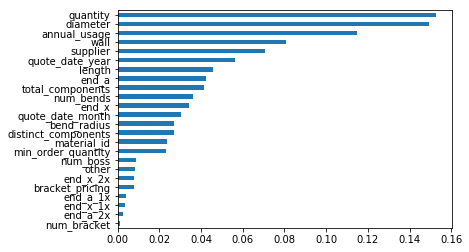

In [143]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh();

### [Submit](https://www.kaggle.com/c/caterpillar-tube-pricing/submit) your predictions to the Kaggle competition

In [0]:
test_wrangled = wrangle(test)

In [0]:
test_X = test_wrangled[features]

In [0]:
test_y = pipeline.predict(test_X)

In [0]:
submission = pd.read_csv('sample_submission.csv')

In [152]:
submission.head()

,id,cost
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
submission['cost'] = test_y

In [154]:
submission.head()

,id,cost
0,1,22.579470
1,2,13.209495
2,3,7.404450
3,4,5.806435
4,5,4.312470


In [0]:
submission.to_csv('submission.csv', index=False)